<a href="https://colab.research.google.com/github/ivnizhnik/Sales_Predictions_DataScienceProject/blob/main/Sales_Predictions_DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
Sales_Predictions_DataScienceProject='/content/drive/MyDrive/Data_Science_Project/sales_predictions.csv'
df=pd.read_csv(Sales_Predictions_DataScienceProject)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# 1) How many rows and columns? 8,523 rows and 12 columns
df.shape

(8523, 12)

In [ ]:
# 2) What are the datatypes of each variable? (see below the list) There are: float64(4), int64(1), object(7)
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# 3) Are there duplicates? If so, drop any duplicates.
# Duplicated rows: there are 0 duplicated rows in this dataset
df.duplicated().sum()

0

In [ ]:
df.duplicated().any()

False

In [ ]:
# 4) Identify missing values: Missing values are in columns 'Item_Weight column' & 'Outlet_Size column'

# Item_Identifier column (Unique product ID) has 0 missing values
# Item_Weight column (Weight of product) has 1463 missing values ****
# Item_Fat_Content column (Whether the product is low fat or regular) has 0 missing values
# Item_Visibility column (The percentage of total display area of all products in a store allocated to the particular product) has 0 missing values
# Item_Type column (The category to which the product belongs) has 0 missing values
# Item_MRP column (Maximum Retail Price (list price) of the product) has 0 missing values
# Outlet_Identifier column (Unique store ID) has 0 missing value
# Outlet_Establishment_Year column (The year in which store was established) has 0 missing value
# Outlet_Size column (The size of the store in terms of ground area covered) has 2410 missing values ****
# Outlet_Location_Type column (The type of area in which the store is located) has 0 missing values
# Outlet_Type column (Whether the outlet is a grocery store or some sort of supermarket) has 0 missing values
# Item_Outlet_Sales  column (	Sales of the product in the particular store. This is the target variable to be predicted.) has 0 missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
df['Item_Weight'].value_counts().max

<bound method Series.max of 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64>

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [ ]:
df.median()

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [ ]:
df.round(2).mode()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDG33,12.15,Low Fat,0.03,Fruits and Vegetables,196.51,OUT027,1985.0,Medium,Tier 3,Supermarket Type1,958.75
1,FDW13,NaN,NaN,NaN,NaN,196.58,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To explore the data that has NA values: 
null_weight = pd.isnull(df['Item_Weight'])
df[null_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
# Imputing missing data in the Item_Weight column with the mean, 12.86, as we have 1463 (~17%) missing values in this column with the SD 4.64 and 50% of values within the mean. 
# Confirming that there are no missing values after addressing them in Item_Weight column
df['Item_Weight'].fillna(value= 12.86, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# To explore the data that has NA values: 
null_size = pd.isnull(df['Outlet_Size'])
df[null_size].head(40)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [ ]:
# There is no clear pattern between tier 3, tier 2, grocery store, supermarket type 1, and outlet size. It is reasonable to impute missing data in the Item_size column with mode
df.head(40)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.860,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Outlet_Size'].fillna(value= 'Medium', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
# Checking for inconsistencies & fixing

df['Item_Identifier'].value_counts().head(20)

FDG33    10
FDW13    10
NCF42     9
FDW49     9
FDX20     9
FDP25     9
DRE49     9
FDX31     9
NCY18     9
FDX04     9
FDD38     9
FDO19     9
FDW26     9
FDQ40     9
NCJ30     9
FDF56     9
FDV38     9
NCL31     9
NCI54     9
FDT07     9
Name: Item_Identifier, dtype: int64

In [ ]:
df['Item_Weight'].value_counts().head(20)

12.86    1463
12.15      86
17.60      82
13.65      77
11.80      76
15.10      68
9.30       68
10.50      66
16.70      66
19.35      63
20.70      62
16.00      62
9.80       61
17.75      60
17.70      60
18.85      59
15.00      59
15.85      59
16.75      58
18.25      58
Name: Item_Weight, dtype: int64

In [ ]:
# Some inconsistencies 
df['Item_Fat_Content'].value_counts().head()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# We see that there is "LF" & "low fat" that should be "Low Fat". Also, 'reg' that should be "Regular".
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts().head()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df['Item_Fat_Content'].value_counts().head()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Visibility'].value_counts().head(20)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
Name: Item_Visibility, dtype: int64

In [ ]:
df['Item_Type'].value_counts().head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

In [ ]:
df['Item_MRP'].value_counts().head()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
Name: Item_MRP, dtype: int64

In [ ]:
df['Outlet_Identifier'].value_counts().head(20)

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df['Outlet_Establishment_Year'].value_counts().head()

1985    1463
1987     932
1999     930
1997     930
2004     930
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts().head()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts().head()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts().head()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Item_Outlet_Sales'].value_counts().head()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
Name: Item_Outlet_Sales, dtype: int64

In [ ]:
#  8) For any numerical columns, obtain the summary statistics of each (min, max, mean): Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


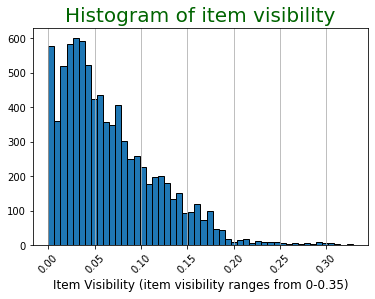

In [ ]:
# The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

# For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

# Histogram to view the distributions of various features in your dataset.
# Boxplot to view statistical summaries of various features in your dataset.
# Heatmap of the correlation between features.

df['Item_Visibility'].hist(bins=50, edgecolor='black')
plt.title('Histogram of item visibility', fontsize = 20, c='darkgreen')
plt.xticks(rotation = 45)
plt.xlabel('Item Visibility (item visibility ranges from 0-0.35)', fontsize = 12)
plt.grid(axis = 'y')
plt.ticklabel_format(useOffset=False, style='plain')

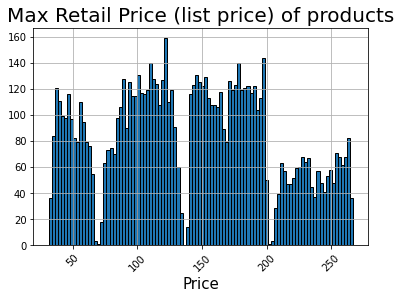

In [ ]:
df['Item_MRP'].hist(bins=100, edgecolor='black')
plt.xticks(rotation = 45)
plt.title('Max Retail Price (list price) of products', fontsize = 20, c='black')
plt.xlabel('Price', fontsize = 15)
plt.ticklabel_format(useOffset=False, style='plain')

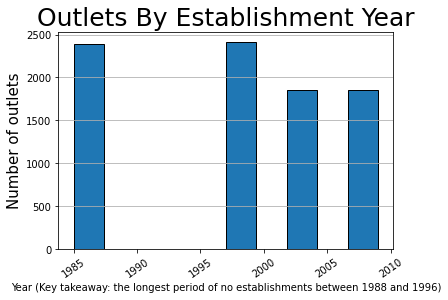

In [ ]:
df['Outlet_Establishment_Year'].hist(edgecolor='black')
plt.xticks(rotation = 35)
plt.title('Outlets By Establishment Year', fontsize = 25, c='k')
plt.xlabel('Year (Key takeaway: the longest period of no establishments between 1988 and 1996)', fontsize = 10)
plt.ylabel('Number of outlets', fontsize = 15)
plt.grid(axis = 'x')
plt.ticklabel_format(useOffset=False, style='plain')

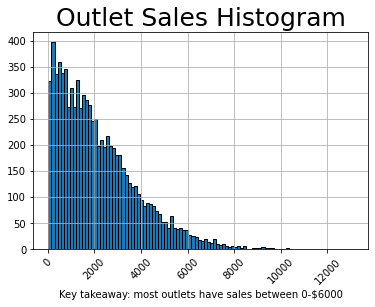

In [ ]:
df['Item_Outlet_Sales'].hist(bins=100, edgecolor='black')
plt.xticks(rotation = 45)
plt.title('Outlet Sales Histogram', fontsize = 25, c='k')
plt.xlabel('Key takeaway: most outlets have sales between 0-$6000', fontsize = 10)
plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

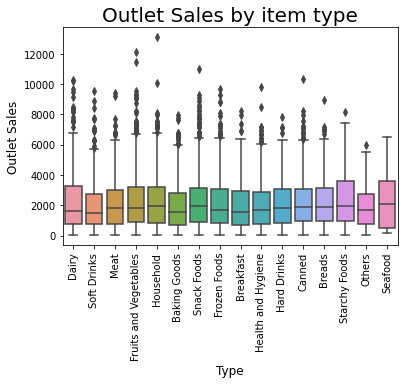

In [ ]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 90);
plt.title('Outlet Sales by item type', fontsize = 20, c='k');
plt.xlabel('Type', fontsize = 12);
plt.ylabel('Outlet Sales', fontsize = 12);

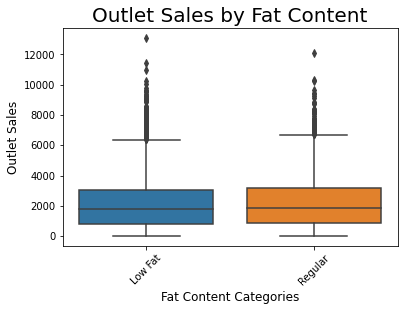

In [ ]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45);
plt.title('Outlet Sales by Fat Content', fontsize = 20, c='k');
plt.xlabel('Fat Content Categories', fontsize = 12);
plt.ylabel('Outlet Sales', fontsize = 12);

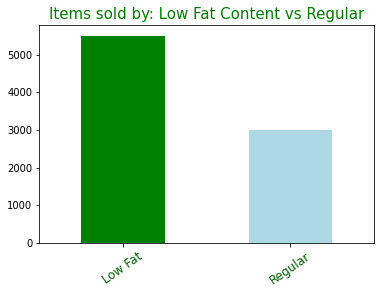

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
fat_filter = df['Item_Fat_Content'].value_counts()
fat_filter.plot(kind = 'bar', color = ['green','lightblue'])
plt.title('Items sold by: Low Fat Content vs Regular', fontsize = 15, c= 'g' )
plt.xticks(rotation = 35, fontsize = 12, c = 'darkgreen')
plt.show();

fat_filter

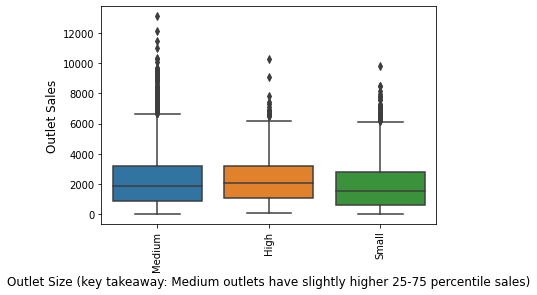

In [ ]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 90);
plt.xlabel('Outlet Size (key takeaway: Medium outlets have slightly higher 25-75 percentile sales)', fontsize = 12);
plt.ylabel('Outlet Sales', fontsize = 12);

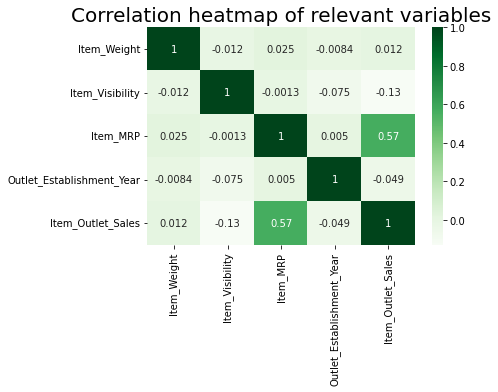

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
plt.title('Correlation heatmap of relevant variables', fontsize = 20, c='k');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# categorical variablies
# Item_Identifier            8523 non-null   object
# Item_Fat_Content           8523 non-null   object 
# Item_Type                  8523 non-null   object 
# Outlet_Identifier          8523 non-null   object 
# Outlet_Size                8523 non-null   object 
# Outlet_Location_Type       8523 non-null   object 
# Outlet_Type                8523 non-null   object 

In [ ]:
# 1) Transform the categorical variable into by dummy encoding it.
# Method 1: Pandas get_dummies
ohe_df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)


In [ ]:
ohe_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
list(ohe_df.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Fat_Content_Regular',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [ ]:
# 2) Separate your data into the features matrix (X) and target vector (y).

features_outlet =['Item_Weight',
            'Item_Visibility',
            'Item_MRP',
            'Outlet_Establishment_Year',
            'Item_Fat_Content_Regular',
            'Item_Type_Breads',
            'Item_Type_Breakfast',
            'Item_Type_Canned',
            'Item_Type_Dairy',
            'Item_Type_Frozen Foods',
            'Item_Type_Fruits and Vegetables',
            'Item_Type_Hard Drinks',
            'Item_Type_Health and Hygiene',
            'Item_Type_Household',
            'Item_Type_Meat',
            'Item_Type_Others',
            'Item_Type_Seafood',
            'Item_Type_Snack Foods',
            'Item_Type_Soft Drinks',
            'Item_Type_Starchy Foods',
            'Outlet_Identifier_OUT013',
            'Outlet_Identifier_OUT017',
            'Outlet_Identifier_OUT018',
            'Outlet_Identifier_OUT019',
            'Outlet_Identifier_OUT027',
            'Outlet_Identifier_OUT035',
            'Outlet_Identifier_OUT045',
            'Outlet_Identifier_OUT046',
            'Outlet_Identifier_OUT049',
            'Outlet_Size_Medium',
            'Outlet_Size_Small',
            'Outlet_Location_Type_Tier 2',
            'Outlet_Location_Type_Tier 3',
            'Outlet_Type_Supermarket Type1',
            'Outlet_Type_Supermarket Type2',
            'Outlet_Type_Supermarket Type3']

# Get columns for features matrix
ohe_df.loc[:, features_outlet]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
X = ohe_df.loc[:, features_outlet]

In [ ]:
X.shape

(8523, 36)

In [ ]:
y = ohe_df['Item_Outlet_Sales']


In [ ]:
y = ohe_df.loc[:, 'Item_Outlet_Sales'].values

In [ ]:
y.shape

(8523,)

In [ ]:
# Train Test Split the Data
from sklearn.model_selection import train_test_split

In [ ]:
#  TRAIN & TEST X
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# To verify the split, you can check the length of each:

len(X_train)

6392

In [ ]:
len(X_test)

2131

In [ ]:
# Train & TEST
len(y_train)

6392

In [ ]:
len(y_test)

2131

In [ ]:
# Step 1: 
# Import the model - LinearRegression

from sklearn.linear_model import LinearRegression

In [ ]:
# Step 2: 
# Make an instance of the Model- Make a linear regression instance
reg = LinearRegression()

In [ ]:
# Step 3: 
# Train the model on your training data. This is the step where the model "learns" about the relationship between the features and target.  

# Model is learning the relationship between X and y
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Step 4: 
# Make predictions based on your model

# or to predict all values on the training data
train_preds = reg.predict(X_train)

# predict the values in the test set
test_preds = reg.predict(X_test)

In [ ]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.5615551419174629


In [ ]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.5671041872384914


In [ ]:
# Regression Metrics 
# import

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Training RMSE: 1139.1040937388918
Testing RMSE: 1092.8630817241492


In [ ]:
print('Coef:', reg.coef_)
print('Intercept:', reg.intercept_)

Coef: [  -1.94181707 -423.39017971   15.72092418  -28.186001     62.6252336
  -28.64831812   45.36106369   27.51619423 -106.33501436   -1.7706262
   45.7540295    13.89489912   27.02541373    5.50974637  -11.86488664
  -26.81372575  327.50113616  -21.93239257  -39.48573523   42.08886467
  274.4105773   214.73380844  984.03915384 -654.02637861 1499.76366105
  229.93584561  -67.74459606  262.56272224  381.80608575 -112.88276654
 -161.52781076  376.92505798 -367.26748736 1295.70444328  984.03915384
 1499.76366105]
Intercept: 54955.253085568256


In [ ]:
# Regression Trees in Python
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
# Evaluating the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.15639289268157464


It appears that our model overfits significantly. Let's check the depth and number of leaves


In [ ]:
dec_tree.get_depth()

38

In [ ]:
dec_tree.get_n_leaves()

6229

In [ ]:
dec_tree_19 = DecisionTreeRegressor(max_depth = 19, random_state = 42)
dec_tree_19.fit(X_train, y_train)
train_19_score = dec_tree_19.score(X_train, y_train)
test_19_score = dec_tree_19.score(X_test, y_test)
print(train_19_score)
print(test_19_score)

0.9360107218757694
0.2272886956765151


With 19 depth, it's improving. But it's still overfitting. After a few tries, it looks like 5 provides the best test score r-squared.

In [ ]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.612057803720431
0.5856983281382546


Now, looking at the bagged trees

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg.predict(X_test)

array([1043.6415 , 1224.87226,  637.03744, ..., 4155.45754, 1831.6158 ,
       2126.83152])

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9188424817137562
0.5197818379342225


Using Bagged Trees did improve our training data set predictability, but slightly reduce predictability on the test data set. Now going to random forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.predict(X_test)

array([ 853.508994,  934.25056 ,  694.542586, ..., 3831.259546,
       1937.804242, 2154.948254])

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9377852977989481
0.5533692898930913


In [ ]:
rf_5 = RandomForestRegressor(max_depth =5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.6197490695997636
0.6029156386774941


In [ ]:
rf_5v = RandomForestRegressor(max_depth =5, random_state = 42, n_estimators=200)
rf_5v.fit(X_train, y_train)
rf_5v_train_score = rf_5v.score(X_train, y_train)
rf_5v_test_score = rf_5v.score(X_test, y_test)
print(rf_5v_train_score)
print(rf_5v_test_score)

0.6194818956068611
0.6033960931067341
